In [13]:
# import packages
import numpy as np
import pandas as pd
import os
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [14]:
# Path to the folder containing the chunked data
data_folder = "../data/"
output_folder = "../output/"

# Load data
AAA_yield_curve_data = pd.read_csv(data_folder + "AAA.csv")
euroarea_yield_curve_data = pd.read_csv(data_folder + "euroarea.csv")

In [15]:
# Filter the DataFrame based on the categorical column, in this case DATA_TYPE_FM
parameter_filter = (AAA_yield_curve_data['DATA_TYPE_FM'] == 'BETA0') | (AAA_yield_curve_data['DATA_TYPE_FM'] == 'BETA1') |\
                    (AAA_yield_curve_data['DATA_TYPE_FM'] == 'BETA2') | (AAA_yield_curve_data['DATA_TYPE_FM'] == 'BETA3') |\
                    (AAA_yield_curve_data['DATA_TYPE_FM'] == 'TAU1') | (AAA_yield_curve_data['DATA_TYPE_FM'] == 'TAU2') 

                    
filtered_AAA = AAA_yield_curve_data[parameter_filter]
filtered_euroarea = euroarea_yield_curve_data[parameter_filter]

/var/folders/07/r8yrsw3j65v2937ssq1kyq8r0000gn/T/ipykernel_90143/697568881.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_euroarea = euroarea_yield_curve_data[parameter_filter]


In [16]:
# Select the desired columns and create a new DataFrame
AAA_parameters = filtered_AAA[['TIME_PERIOD', 'DATA_TYPE_FM', 'OBS_VALUE']].copy()
euroarea_parameters = filtered_euroarea[['TIME_PERIOD', 'DATA_TYPE_FM', 'OBS_VALUE']].copy()

In [17]:
# Pivot the DataFrame
pivoted_AAA = AAA_parameters.pivot(index='TIME_PERIOD', columns='DATA_TYPE_FM', values='OBS_VALUE')
pivoted_euroarea = euroarea_parameters.pivot(index='TIME_PERIOD', columns='DATA_TYPE_FM', values='OBS_VALUE')

# Reset the index and turn it into a regular column
pivoted_AAA = pivoted_AAA.reset_index()
pivoted_euroarea = pivoted_euroarea.reset_index()

pivoted_euroarea

DATA_TYPE_FM,TIME_PERIOD,BETA0,BETA1,BETA2,BETA3
0,2004-09-06,5.442098,-3.543428,1.338503,-0.283216
1,2004-09-07,5.440139,-3.544804,1.243713,-0.043414
2,2004-09-08,5.427176,-3.532165,1.269052,0.043860
3,2004-09-09,5.395118,-3.488823,1.319767,-0.153949
4,2004-09-10,5.364145,-3.447313,1.396243,-0.396638
...,...,...,...,...,...
4682,2022-12-23,2.423203,-1.174035,4.486565,3.464780
4683,2022-12-27,2.411920,-1.185920,4.866093,3.561085
4684,2022-12-28,2.432098,-1.193382,4.869678,3.503896
4685,2022-12-29,2.439350,-1.176350,4.814431,3.580839


In [18]:
pivoted_AAA

DATA_TYPE_FM,TIME_PERIOD,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
0,2004-09-06,5.410510,-3.462358,-0.361335,-0.466368,3.128331,1.489535
1,2004-09-07,5.391886,-3.450353,-0.372908,-0.271295,3.157868,1.548566
2,2004-09-08,5.385978,-3.447950,-0.346505,-0.198077,3.137857,1.553148
3,2004-09-09,5.377333,-3.432592,-0.382208,-0.293482,3.271392,1.521143
4,2004-09-10,5.355732,-3.395283,-0.375382,-0.507894,3.279876,1.479197
...,...,...,...,...,...,...,...
4682,2022-12-23,1.242093,0.032116,3.517481,3.149764,8.849731,0.736498
4683,2022-12-27,1.232093,0.133907,3.645710,2.931309,9.914192,0.743820
4684,2022-12-28,1.223209,0.095788,3.861338,3.086663,10.146320,0.723924
4685,2022-12-29,1.232093,-0.023864,4.025929,3.493396,9.830634,0.683316


##### Issue: euroarea data is missing tau1 and tau2, I try to look into the category counts in the raw data
Sol: skip this alltogether and load use ready files (_parameters)

In [19]:
# Load data
AAA_parameters = pd.read_csv(data_folder + "AAA_parameters.csv")
euroarea_parameters = pd.read_csv(data_folder + "euroarea_parameters.csv")

In [20]:
# Get the unique categories and their counts
category_counts_AAA = AAA_yield_curve_data['DATA_TYPE_FM'].value_counts()
category_counts_euroarea = euroarea_yield_curve_data['DATA_TYPE_FM'].value_counts()

In [21]:
AAA_parameters

,TIME_PERIOD,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
0,2004-09-06,5.410510,-3.462358,-0.361335,-0.466368,3.128331,1.489535
1,2004-09-07,5.391886,-3.450353,-0.372908,-0.271295,3.157868,1.548566
2,2004-09-08,5.385978,-3.447950,-0.346505,-0.198077,3.137857,1.553148
3,2004-09-09,5.377333,-3.432592,-0.382208,-0.293482,3.271392,1.521143
4,2004-09-10,5.355732,-3.395283,-0.375382,-0.507894,3.279876,1.479197
...,...,...,...,...,...,...,...
4682,2022-12-23,1.242093,0.032116,3.517481,3.149764,8.849731,0.736498
4683,2022-12-27,1.232093,0.133907,3.645710,2.931309,9.914192,0.743820
4684,2022-12-28,1.223209,0.095788,3.861338,3.086663,10.146320,0.723924
4685,2022-12-29,1.232093,-0.023864,4.025929,3.493396,9.830634,0.683316


In [22]:
euroarea_parameters

,TIME_PERIOD,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
0,2004-09-06,5.442098,-3.543428,1.338503,-0.283216,4.967568,1.877315
1,2004-09-07,5.440139,-3.544804,1.243713,-0.043414,5.040247,1.941234
2,2004-09-08,5.427176,-3.532165,1.269052,0.043860,5.023621,1.931735
3,2004-09-09,5.395118,-3.488823,1.319767,-0.153949,5.174891,1.903900
4,2004-09-10,5.364145,-3.447313,1.396243,-0.396638,5.213259,1.864572
...,...,...,...,...,...,...,...
4682,2022-12-23,2.423203,-1.174035,4.486565,3.464780,7.750559,0.623971
4683,2022-12-27,2.411920,-1.185920,4.866093,3.561085,8.108593,0.637345
4684,2022-12-28,2.432098,-1.193382,4.869678,3.503896,8.101759,0.636384
4685,2022-12-29,2.439350,-1.176350,4.814431,3.580839,8.249017,0.618625


In [23]:
maturity_names = ['1d', '1m', '3m', '6m', '9m', '1y', '1.5y', '2y', '3y', '4y', '5y', '6y', '7y', '8y', '9y', '10y', '15y', '20y'] 
maturities = [1, 30, 90, 180, 270, 360, 540, 720, 1080, 1440, 1800, 2160, 2520, 2880, 3240, 3600, 5400, 7200]
maturities_yr = [x / 360 for x in maturities]

In [24]:
maturities_yr

[0.002777777777777778,
 0.08333333333333333,
 0.25,
 0.5,
 0.75,
 1.0,
 1.5,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 15.0,
 20.0]

In [25]:
def NSS_ytm(maturities,t,beta0,beta1,beta2,beta3,tau1,tau2):
    output = pd.DataFrame()
    output ['t'] = t
    for m in maturities:
        output [str(m)] =  beta0 + beta1 * ((1-np.exp(-m/tau1))/(m/tau1)) + beta2 * ((1-np.exp(-m/tau1))/(m/tau1)-np.exp(-m/tau1)) +\
            beta3 * ((1-np.exp(-m/tau2))/(m/tau2)-np.exp(-m/tau2)) 
    return output


In [26]:
AAA_parameters

,TIME_PERIOD,BETA0,BETA1,BETA2,BETA3,TAU1,TAU2
0,2004-09-06,5.410510,-3.462358,-0.361335,-0.466368,3.128331,1.489535
1,2004-09-07,5.391886,-3.450353,-0.372908,-0.271295,3.157868,1.548566
2,2004-09-08,5.385978,-3.447950,-0.346505,-0.198077,3.137857,1.553148
3,2004-09-09,5.377333,-3.432592,-0.382208,-0.293482,3.271392,1.521143
4,2004-09-10,5.355732,-3.395283,-0.375382,-0.507894,3.279876,1.479197
...,...,...,...,...,...,...,...
4682,2022-12-23,1.242093,0.032116,3.517481,3.149764,8.849731,0.736498
4683,2022-12-27,1.232093,0.133907,3.645710,2.931309,9.914192,0.743820
4684,2022-12-28,1.223209,0.095788,3.861338,3.086663,10.146320,0.723924
4685,2022-12-29,1.232093,-0.023864,4.025929,3.493396,9.830634,0.683316


In [27]:
output_AAA = NSS_ytm(maturities_yr,AAA_parameters['TIME_PERIOD'],AAA_parameters['BETA0'], AAA_parameters['BETA1'], AAA_parameters['BETA2'], AAA_parameters['BETA3'], AAA_parameters['TAU1'], AAA_parameters['TAU2'])
output_euroarea = NSS_ytm(maturities_yr, euroarea_parameters['TIME_PERIOD'],euroarea_parameters['BETA0'], euroarea_parameters['BETA1'], euroarea_parameters['BETA2'], euroarea_parameters['BETA3'], euroarea_parameters['TAU1'], euroarea_parameters['TAU2']) 

In [28]:
# add t as a column name
maturity_names.insert(0, 't')
maturity_names

['t',
 '1d',
 '1m',
 '3m',
 '6m',
 '9m',
 '1y',
 '1.5y',
 '2y',
 '3y',
 '4y',
 '5y',
 '6y',
 '7y',
 '8y',
 '9y',
 '10y',
 '15y',
 '20y']

In [29]:
# Renaming the columns
output_AAA.columns = maturity_names
output_euroarea.columns = maturity_names

In [31]:
output_AAA

,t,1d,1m,3m,6m,9m,1y,1.5y,2y,3y,4y,5y,6y,7y,8y,9y,10y,15y,20y
0,2004-09-06,1.949093,1.976563,2.034172,2.121920,2.210407,2.298838,2.473145,2.641262,2.951578,3.223235,3.457222,3.657429,3.828505,3.974939,4.100712,4.209220,4.576354,4.779293
1,2004-09-07,1.942643,1.974783,2.040893,2.138822,2.234922,2.328891,2.509583,2.679766,2.987293,3.252486,3.479518,3.673463,3.839294,3.981472,4.103839,4.209626,4.569196,4.768947
2,2004-09-08,1.939224,1.973762,2.044384,2.148064,2.248871,2.346666,2.532909,2.706542,3.016998,3.282196,3.507894,3.699959,3.863753,4.003922,4.124390,4.228419,4.581290,4.776881
3,2004-09-09,1.945768,1.975555,2.037111,2.128935,2.219696,2.308988,2.481980,2.646224,2.945649,3.206136,3.430628,3.623456,3.789113,3.931745,4.054972,4.161872,4.527995,4.733254
4,2004-09-10,1.961251,1.984750,2.034645,2.111976,2.191267,2.271566,2.432273,2.589654,2.884699,3.146724,3.374729,3.571385,3.740559,3.886214,4.011975,4.120981,4.493569,4.702037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,2022-12-23,1.280681,1.455823,1.750226,2.058004,2.251950,2.369689,2.471936,2.487940,2.452971,2.423084,2.414544,2.419854,2.431327,2.444106,2.455538,2.464312,2.460611,2.397760
4683,2022-12-27,1.371952,1.533115,1.804506,2.089131,2.269272,2.379211,2.475782,2.492056,2.461602,2.435913,2.430859,2.439572,2.454734,2.471606,2.487509,2.501054,2.522382,2.480566
4684,2022-12-28,1.325420,1.498971,1.789419,2.090595,2.278150,2.390295,2.484428,2.496117,2.460086,2.434268,2.431940,2.444502,2.463835,2.484858,2.504746,2.522043,2.558131,2.524944
4685,2022-12-29,1.215882,1.421762,1.761491,2.104636,2.310214,2.426932,2.512841,2.511002,2.456581,2.424919,2.422944,2.438101,2.460569,2.484610,2.507164,2.526705,2.568391,2.534986


In [32]:
output_euroarea

,t,1d,1m,3m,6m,9m,1y,1.5y,2y,3y,4y,5y,6y,7y,8y,9y,10y,15y,20y
0,2004-09-06,1.899825,1.933225,2.001665,2.102528,2.201078,2.297177,2.481651,2.655494,2.971161,3.245999,3.483732,3.688723,3.865320,4.017550,4.148995,4.262767,4.646855,4.853754
1,2004-09-07,1.896623,1.933742,2.009089,2.118527,2.223801,2.325058,2.516104,2.692793,3.007337,3.276536,3.507232,3.705306,3.875767,4.022856,4.150152,4.260667,4.637345,4.843471
2,2004-09-08,1.896369,1.935475,2.014613,2.129000,2.238442,2.343190,2.539533,2.719752,3.037741,3.307449,3.537117,3.733412,3.901783,4.046708,4.171888,4.280397,4.649060,4.849884
3,2004-09-09,1.907473,1.941476,2.010833,2.112336,2.210789,2.306193,2.487949,2.657901,2.964255,3.229666,3.458998,3.657002,3.828046,3.976009,4.104270,4.215735,4.595848,4.803332
4,2004-09-10,1.917827,1.946675,2.006281,2.095246,2.183342,2.270257,2.439572,2.601720,2.901460,3.166982,3.399440,3.601648,3.777004,3.928947,4.060685,4.175095,4.563667,4.773952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,2022-12-23,1.257872,1.491167,1.872535,2.253682,2.482311,2.616360,2.735761,2.773351,2.809828,2.866922,2.941703,3.020453,3.094889,3.161214,3.218105,3.265487,3.384072,3.377962
4683,2022-12-27,1.234774,1.470383,1.857639,2.248538,2.486312,2.628087,2.758346,2.802093,2.844336,2.905282,2.984554,3.068560,3.148661,3.220730,3.283217,3.335899,3.474573,3.477775
4684,2022-12-28,1.247380,1.480043,1.862526,2.248840,2.484182,2.624931,2.755479,2.800883,2.847032,2.911138,2.992710,3.078400,3.159771,3.232826,3.296099,3.349420,3.490036,3.494192
4685,2022-12-29,1.272024,1.513656,1.907366,2.298355,2.530581,2.664912,2.781056,2.814782,2.847279,2.905064,2.983311,3.067051,3.147297,3.219823,3.283028,3.336645,3.481738,3.491641


In [33]:
# Save files as:
AAA_filename = 'AAA_YTM.csv'
euroarea_filename = 'euroarea_YTM.csv'

output_AAA.to_csv(output_folder + AAA_filename, index=False)
output_euroarea.to_csv(output_folder + euroarea_filename, index=False)


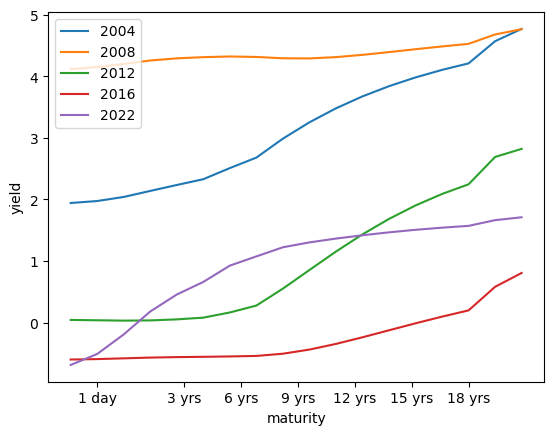

In [35]:
# Transpose dataframes and plot
AAA_transposed = output_AAA.drop('t', axis=1).transpose()
euroarea_transposed = output_euroarea.drop('t', axis=1).transpose()

transposed_output = AAA_transposed.copy()
# Plot the vectors
plt.plot(transposed_output[1], label='2004')
plt.plot(transposed_output[1000], label='2008')
plt.plot(transposed_output[2000], label='2012')
plt.plot(transposed_output[3000], label='2016')
plt.plot(transposed_output[4600], label='2022')

# Add labels and legend
plt.xlabel('maturity')
plt.ylabel('yield')
plt.legend()

# Define custom x-axis tick locations and labels
tick = 15/7
custom_ticks = [1, tick*2, tick*3, tick*4, tick*5 ,tick*6, tick*7]
custom_tick_labels = ['1 day', '3 yrs', '6 yrs', '9 yrs', '12 yrs', '15 yrs', '18 yrs']
plt.xticks(custom_ticks, custom_tick_labels)

# Display the plot
plt.show()

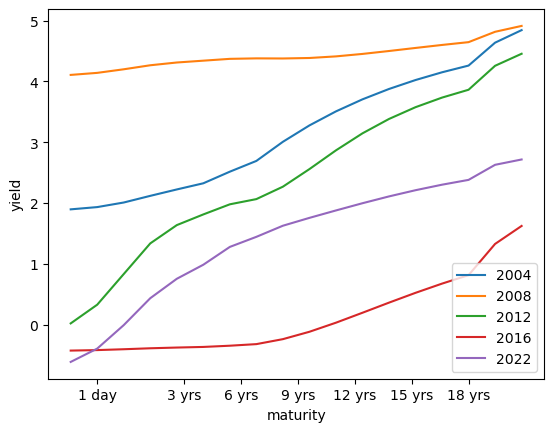

In [36]:
transposed_output = euroarea_transposed.copy()
# Plot the vectors
plt.plot(transposed_output[1], label='2004')
plt.plot(transposed_output[1000], label='2008')
plt.plot(transposed_output[2000], label='2012')
plt.plot(transposed_output[3000], label='2016')
plt.plot(transposed_output[4600], label='2022')

# Add labels and legend
plt.xlabel('maturity')
plt.ylabel('yield')
plt.legend()

# Define custom x-axis tick locations and labels
tick = 15/7
custom_ticks = [1, tick*2, tick*3, tick*4, tick*5 ,tick*6, tick*7]
custom_tick_labels = ['1 day', '3 yrs', '6 yrs', '9 yrs', '12 yrs', '15 yrs', '18 yrs']
plt.xticks(custom_ticks, custom_tick_labels)

# Display the plot
plt.show()

In [74]:
AAA_yield_curve_data['TIME_PERIOD'].max()

'2022-12-30'

In [76]:
pivoted_AAA['TIME_PERIOD'][4600]

'2022-08-31'